# Transformada de Fourier discreta

La transformada discreta de fourier se define de la siguiente manera:

$X_{k}=\sum _{n=0}^{N-1}x_{n}e^{-{\frac {2\pi i}{N}}kn}\quad \quad k=0,\dots ,N-1$

La expresión anterior se puede escalar a una matriz unitaria y $X_{k}$ son los coeficientes de x en una base ortonormal.

Por lo que podriamos representar la transformada como sigue:

$X = M ^. x$
 
Donde $M_{kn} = e^{-{\frac {2\pi i}{N}}kn}$

In [44]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [45]:
# Definiendo una funcion para calcular la transformada de fourier

def fourier(x):
    x = np.asarray(x, dtype=float) #convierte x en arreglo de tipo flotante
    N = x.shape[0] # Regresa la dimension del arreglo (en este caso el numero de filas)
    n = np.arange(N) # Regresa un arreglo con valores espaciados de 0 hasta N
    k = n.reshape((N, 1)) # Regresa un arreglo de N-1 por 2 dimensiones.
    M = np.exp(-2j * np.pi * k * n / N) # Regresa la matriz M de la transf. de fourier
    return np.dot(M, x) # Producto punto de matriz M y vector x

# Definiendo curva gaussiana
def gauss(mu,sigma,bins):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )


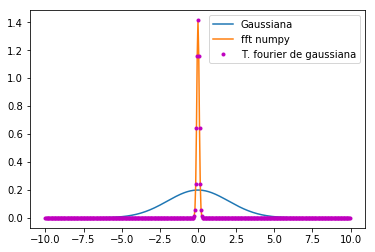

In [82]:
# Generando datos de la gaussiana
N = 100
x = np.arange(-10,10,10./(2*N))
mu = 0.
sigma = 2.
y = gauss(mu,sigma,x)
# Realizando la transformada de fourier de la gaussina
tf = fourier(y)
# Comparando con numpy fast fourier transform fft
ft = np.fft.fft(y)

# Se ordenan los arreglos para poder graficar con fftshift 
# fftshift solo mueve los valores del arreglo no calcula la transformada
# Se toma el absoluto de ft y tf porque son valores complejos
tf_corregida = np.fft.fftshift(np.abs(ft))/ np.sqrt(2 * N)
y_fft = np.fft.fftshift(np.abs(tf))/ np.sqrt(2 * N)
plt.plot(x,y,label='Gaussiana')
plt.plot(x,tf_corregida,label='fft numpy')
plt.plot(x,y_fft,'m.',label='T. fourier de gaussiana')
plt.legend()
plt.show()


In [79]:
# Comparando resultados de tf con el obtenido en fft

# También podemos comprobar que los resultados son aproximados como sigue
print 'Fueron aproximados los resultados de las dos funciones: ', np.allclose(tf,ft)
print 

# Y observar cuanto tiempo de cómputo hace cada uno
print 'Tiempo de cómputo de la funcion fourier'
%timeit tf
print

print 'Tiempo de cómputo de la transformada de numpy fft'
%timeit ft


Fueron aproximados los resultados de las dos funciones:  True

Tiempo de cómputo de la funcion fourier
10000000 loops, best of 3: 108 ns per loop

Tiempo de cómputo de la transformada de numpy fft
10000000 loops, best of 3: 107 ns per loop
